ENPH 252/PHYS 250 2022W Assignment 3
====================================
* Reply by completing this notebook, then submit it to onQ as an .ipnyb (not as a .pdf).  Document all answers.  Reply in a cell beneath each question, with comments in your code, and with illustrations including labels and titles.


* This is open book, and you can work on this with others, but what you submit must reflect your individual work and not be copied from other sources (use of original variable names is recommended).  Rename notebook to YOURLASTNAME.ipynb before submitting.

* Your class grade will be determined by your best 2 assignment grades.

Student last name and name:
-------------------------
Grade /100:
----------

# Q1.1)  (10 pts) Consider the function $f(x) = (\sin x )\,{\rm e}^{\cos x}$.  Determine its analytical integral between points $a$ and $b$, and code the analytical integral in python.  Calculate the value for $a=0$ and $b=\pi$.

The integral is $\int_a^b \sin x \,{\rm e}^{\cos x} \ dx = {\rm e}^{\cos a} - {\rm e}^{\cos b}$

In [3]:
#importing all libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import chi2 as chi2_stat
from scipy.optimize import root_scalar
#defining the function for the integral
def analyticalF(x): return -np.exp(np.cos(x))
#evaluating the integral between 0 and pi/2
print(analyticalF(np.pi)-analyticalF(0))

2.3504023872876028


# Q1.2)  (15 pts) Numerically calculate the same integral using $f$ and package scipy.integrate.  Compare to the analytical integral, and comment.

In [4]:
#defining the function to be integrated
def f(x): return np.sin(x)*np.exp(np.cos(x))
#integrating numerically and printing the result with error
y = integrate.quad(f, 0, np.pi)
print(y[0], "+/-", y[1])
print("The two integrals are equal")

2.350402387287603 +/- 4.3532455952405216e-10
The two integrals are equal


# Q2.1) (10 pts) Load time-series data in file Data_Assgt03_2022W.txt.  Plot with errorbars.

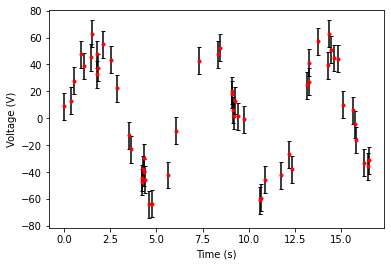

In [5]:
#reding in the data
df = pd.read_csv("Data_Assgt03_2022W.txt", sep='\t', header=None)
#converting the df into arrays for each column
T = df.iloc[1:,0].to_numpy(dtype=float)
V = df.iloc[1:,1].to_numpy(dtype=float)
err = df.iloc[1:,2].to_numpy(dtype=float)
#plotting with error bars
plt.errorbar(T, V, yerr=err, fmt='ro',ecolor='k', ms=3, capsize=2)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

# Q2.2)  (20 pts) Use a model $y = a \sin t$ with parameter $a$  to build a $\chi^2$ function, and minimize it, using scipy.optimize.  Estimate parameter $a$.  Overlay fit on data.

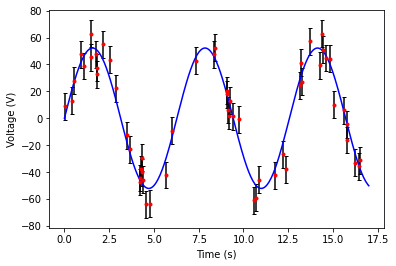

a= 52.21160888671875


In [6]:
#defining the model to be optimized
def sinModel(a,t): return a*np.sin(t)
#defining chi2 function for the model
def chi2(a): return np.sum([(x-sinModel(a,t))**2/e**2 for x,t,e in zip(V,T,err)])
#getting the value with minimized chi2
res = minimize(chi2, 60, method='Nelder-Mead')
#plotting the data with error bars
plt.errorbar(T, V, yerr=err, fmt='ro',ecolor = 'k', ms=3, capsize=2)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
#generating list of times to cover the range of the data
ts = np.linspace(0, 17, 300)
#plotting the time values and the optimized model
plt.plot(ts, sinModel(res.x,ts), 'b-')
plt.show()
print("a=", res.x[0])         

# Q2.3)  (15 pts) Display value of $\chi^2$,  degrees of freedom and p-value of this model. Is this a good fit?

In [7]:
print("The chi-squared value is", chi2(res.x))
#degrees of freedom is the number of data points minus the number of parameters
dof = len(T)-1
print("Degrees of freedom =", dof)
chi2hat = chi2(res.x)
#calculating p-value
p = chi2_stat.sf(chi2hat, df=dof)
print("p-value =", p)
print("This is a good fit because p is larger than 0.05 indicating that results are significant.")

print("As well, chi2Hat/dof is", chi2hat/dof, "which close to 1 indicating a good fit")

The chi-squared value is 50.794308973778534
Degrees of freedom = 56
p-value = 0.6716484153943276
This is a good fit because p is larger than 0.05 indicating that results are significant and chi2Hat/dof is 0.9070412316746167 which close to 1 indicating a good fit


# Q2.4)  (15 pts) Plot $\chi^2(a)$.

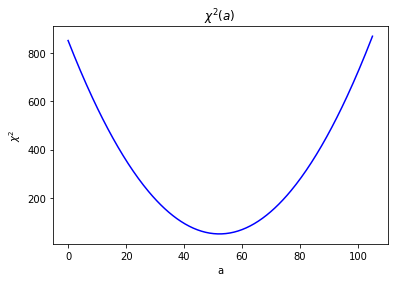

In [8]:
#creating a list of a values
As = np.linspace(0, 105, 300)
#creating a list of chi2 values for each a value
chi2s = [chi2(a) for a in As]
#plotting the chi2 values against the a values
plt.plot(As, chi2s, 'b-')
plt.xlabel("a")
plt.ylabel("$\chi^2$")
plt.title("$\chi^2(a)$")
plt.show()

# Q2.5)  (15 pts) Determine the 68% confidence interval for $a$ using  $\Delta \chi^2 = 1$ and library optimize.root_scalar.

In [9]:
ghat = res.x
#defining delta chi2 = 1
def deltachi2(a): return chi2(a)-chi2(ghat)-1.0
#finding the lower and upper values for when delta chi2 = 0, which is really delta chi2 = 1 since 1 was subtracted in the function definition
gHi = (root_scalar(deltachi2, bracket=[ghat, ghat +10], method='brentq')).root
gLo = (root_scalar(deltachi2, bracket=[ghat-10, ghat], method='brentq')).root
print("68% confidence interval for a is", [gLo, gHi])

68% confidence interval for a is [50.36622867827354, 54.056940945214194]
